# Housing Wellness

This notebook explores the relationship between median income and home buying cost for U.S. counties and states.

### Zillow Data

In [1]:
import matplotlib
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
zillow_data = pd.read_csv('http://files.zillowstatic.com/research/public/Zip/Zip_Zhvi_Summary_AllHomes.csv')
zillow_data.fillna("", inplace=True)
zillow_data["County and state"] = zillow_data["County"] + ", " + zillow_data["State"]
zillow_data.sort_values(['State', 'County']).head()

,Date,RegionID,RegionName,State,Metro,County,City,SizeRank,Zhvi,MoM,QoQ,YoY,5Year,10Year,PeakMonth,PeakQuarter,PeakZHVI,PctFallFromPeak,LastTimeAtCurrZHVI,County and state
1583,2017-05-31,100223,99504,AK,Anchorage,Anchorage,Anchorage,1583,259500,-0.000385,-0.003456,0.0023175,0.0229214,-0.0032922,2006-10,2006-Q4,271300,-0.043494,2006-06,"Anchorage, AK"
1995,2017-05-31,100226,99507,AK,Anchorage,Anchorage,Anchorage,1995,286000,0.000350,0.000700,0.00245356,0.0237736,-0.00203986,2007-10,2007-Q4,296900,-0.036713,2006-08,"Anchorage, AK"
2553,2017-05-31,100227,99508,AK,Anchorage,Anchorage,Anchorage,2553,242900,-0.001234,-0.001234,-0.0081666,0.022336,-0.00167245,2008-06,2008-Q2,247900,-0.020169,2008-03,"Anchorage, AK"
3966,2017-05-31,100274,99577,AK,Anchorage,Anchorage,Anchorage,3966,319200,0.005038,0.008212,0.00821226,0.0160313,-0.0068465,2006-11,2006-Q4,343600,-0.071013,2006-02,"Anchorage, AK"
4582,2017-05-31,100221,99502,AK,Anchorage,Anchorage,Anchorage,4582,298300,-0.001673,0.008111,0.00641026,0.0254311,-0.00152913,2007-07,2007-Q3,303600,-0.017457,2007-02,"Anchorage, AK"


### Census Data

In [3]:
census_data = pd.read_excel('https://www.census.gov/did/www/saipe/downloads/estmod15/est15ALL.xls')
census_data.columns = census_data.iloc[2] # Renames columns - found in 3rd row of source file
census_data.drop(census_data.index[:3], inplace=True)
census_data.sort_values(['Postal Code', 'Name']).head()

2,State FIPS Code,County FIPS Code,Postal Code,Name,"Poverty Estimate, All Ages",90% CI Lower Bound,90% CI Upper Bound,"Poverty Percent, All Ages",90% CI Lower Bound,90% CI Upper Bound,...,90% CI Upper Bound,Median Household Income,90% CI Lower Bound,90% CI Upper Bound,"Poverty Estimate, Age 0-4",90% CI Lower Bound,90% CI Upper Bound,"Poverty Percent, Age 0-4",90% CI Lower Bound,90% CI Upper Bound
72,02,000,AK,Alaska,74941,71399,78483,10.4,9.9,10.9,...,14.5,73391,71522,75260,8535,7584,9486,15.8,14,17.6
73,02,013,AK,Aleutians East Borough,582,445,719,17.4,13.3,21.5,...,17.1,57015,51101,62929,.,.,.,.,.,.
74,02,016,AK,Aleutians West Census Area,469,354,584,8.5,6.4,10.6,...,10.2,80695,75363,86027,.,.,.,.,.,.
75,02,020,AK,Anchorage Borough,25305,22232,28378,8.7,7.6,9.8,...,13.1,77791,74640,80942,.,.,.,.,.,.
76,02,050,AK,Bethel Census Area,4271,3510,5032,24.2,19.9,28.5,...,39.1,44849,41322,48376,.,.,.,.,.,.


Need to join FIPS state and county codes from Census report to get County Name

In [4]:
fips_counties = pd.read_csv('https://www2.census.gov/geo/docs/reference/codes/files/national_county.txt',
                            header=None, dtype={0: str, 1: str, 2:str, 3 :str, 4:str})
fips_counties.head()

,0,1,2,3,4
0,AL,01,001,Autauga County,H1
1,AL,01,003,Baldwin County,H1
2,AL,01,005,Barbour County,H1
3,AL,01,007,Bibb County,H1
4,AL,01,009,Blount County,H1


In [5]:
census_merged = pd.merge(census_data,
                         fips_counties,
                         left_on=['State FIPS Code', 'County FIPS Code'],
                         right_on=[1, 2])

census_merged["County and state"] = census_merged["Name"].str.replace(" County", "") + ", " + census_merged["Postal Code"]
census_merged.head()

,State FIPS Code,County FIPS Code,Postal Code,Name,"Poverty Estimate, All Ages",90% CI Lower Bound,90% CI Upper Bound,"Poverty Percent, All Ages",90% CI Lower Bound,90% CI Upper Bound,...,90% CI Upper Bound,"Poverty Percent, Age 0-4",90% CI Lower Bound,90% CI Upper Bound,0,1,2,3,4,County and state
0,01,001,AL,Autauga County,6966,5673,8259,12.7,10.3,15.1,...,.,.,.,.,AL,01,001,Autauga County,H1,"Autauga, AL"
1,01,003,AL,Baldwin County,25941,21665,30217,12.9,10.8,15,...,.,.,.,.,AL,01,003,Baldwin County,H1,"Baldwin, AL"
2,01,005,AL,Barbour County,7380,6240,8520,32,27.1,36.9,...,.,.,.,.,AL,01,005,Barbour County,H1,"Barbour, AL"
3,01,007,AL,Bibb County,4516,3584,5448,22.2,17.6,26.8,...,.,.,.,.,AL,01,007,Bibb County,H1,"Bibb, AL"
4,01,009,AL,Blount County,8399,6798,10000,14.7,11.9,17.5,...,.,.,.,.,AL,01,009,Blount County,H1,"Blount, AL"


## Most expensive places to work and own a home

In [19]:
result = pd.merge(zillow_data, census_merged, left_on=['County and state'], right_on=['County and state'])
result.set_index(['County', 'State'])
result['Median Household Income'] = result['Median Household Income'].astype(float)
result['Zhvi'] = result['Zhvi'].astype(float)
result['Housing Index'] = result['Zhvi'] / result['Median Household Income']

subset = result[['County and state', 'Median Household Income', 'Zhvi', 'Housing Index']].copy()
subset.groupby('County and state').mean().sort_values(['Housing Index'], ascending=False).head()

,Median Household Income,Zhvi,Housing Index
County and state,,,
"New York, NY",75136.0,1.363483e+06,18.146871
"Nantucket, MA",86014.0,1.407000e+06,16.357802
"Kings, NY",51026.0,8.134267e+05,15.941415
"San Mateo, CA",101133.0,1.550284e+06,15.329161
"San Francisco, CA",90527.0,1.225109e+06,13.533075


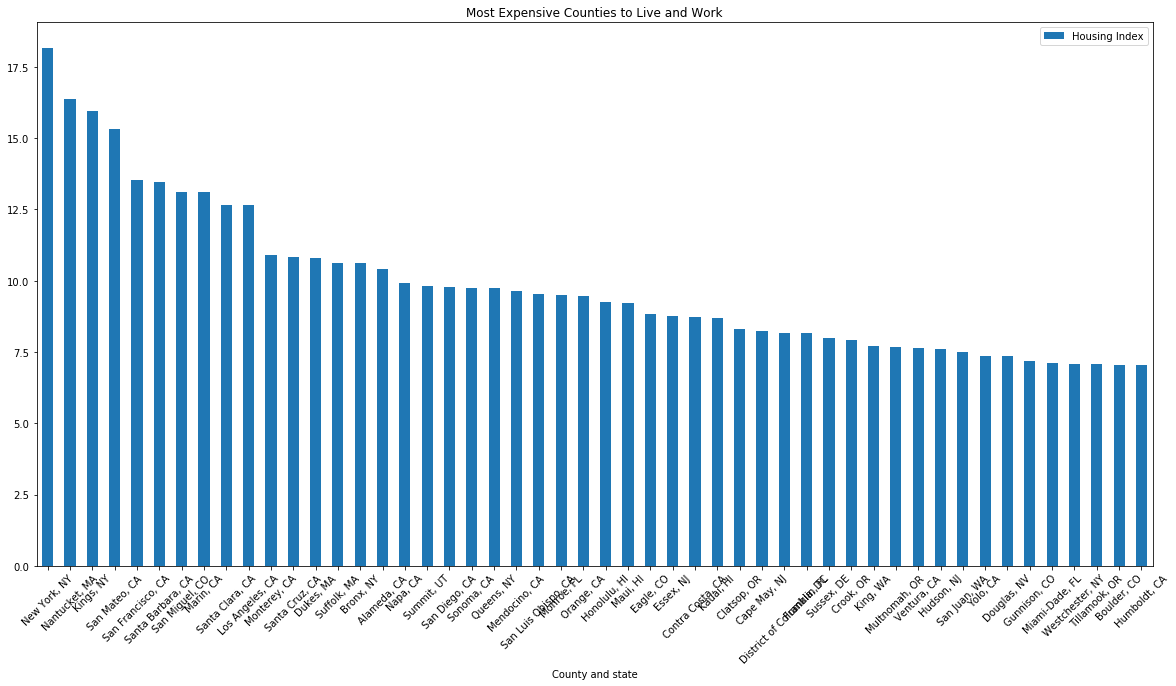

In [20]:
subset.head(50).plot(kind='bar', y='Housing Index', figsize=(20,10), rot=45, title="Most Expensive Counties to Live and Work")

Housing Price (Zillow Home Price) has bigger impact on than Salary.

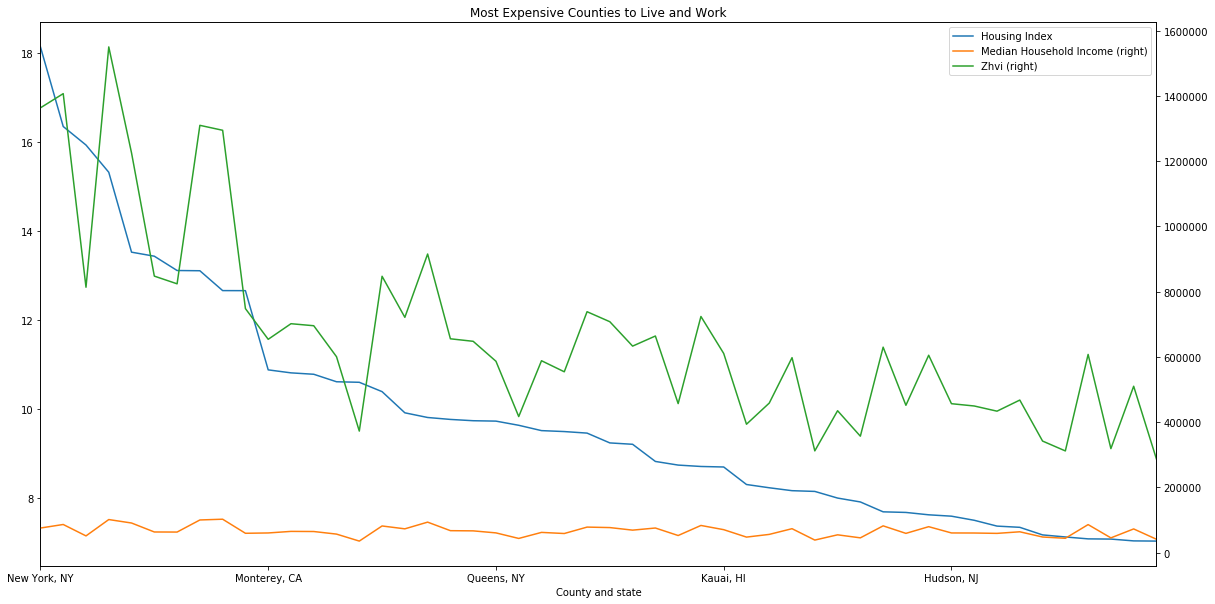

In [48]:
ax = subset.head(50).plot(kind='line', y='Housing Index', figsize=(20,10), rot=45, title="Most Expensive Counties to Live and Work")
ax1 = subset.head(50).plot(secondary_y=['Median Household Income', 'Zhvi'], ax = ax, kind='line', y='Median Household Income')
subset.head(50).plot(secondary_y=['Median Household Income', 'Zhvi'], ax = ax1, kind='line', y='Zhvi')

## Best places to work and own a home

In [9]:
subset.groupby(['County and state']).max().sort_values(['Housing Index'], ascending=True).head()

,Median Household Income,Zhvi,Housing Index
County and state,,,
"Montgomery, IL",46006.0,60200.0,1.308525
"Hockley, TX",48768.0,64600.0,1.324639
"Cambria, PA",43786.0,59200.0,1.352030
"Harrison, TX",46593.0,64600.0,1.386474
"Dickey, ND",56325.0,78100.0,1.386596


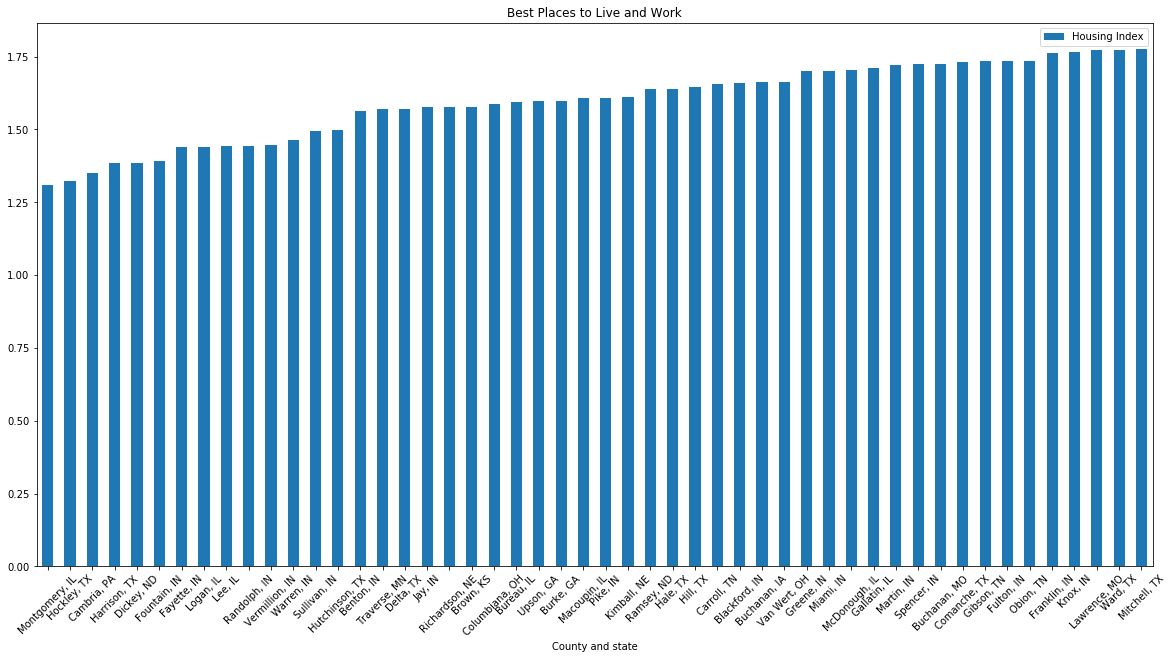

In [10]:
subset = subset.groupby('County and state').mean().sort_values(['Housing Index'], ascending=True)
subset.head(50).plot(kind='bar', y='Housing Index', figsize=(20,10), rot=45, title="Best Places to Live and Work")

Median Salary is highly variable for counties with relatively low-cost homes.

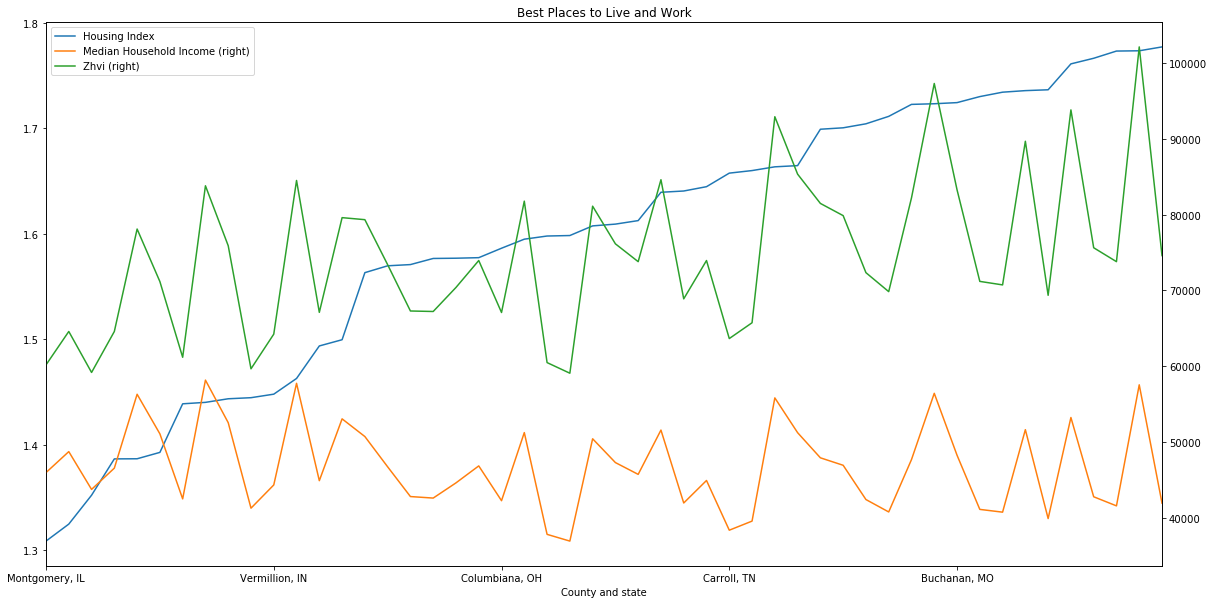

In [11]:
ax = subset.head(50).plot(kind='line', y='Housing Index', figsize=(20,10), rot=45, title="Best Places to Live and Work")
subset.head(50).plot(secondary_y=True, ax = ax, kind='line', y='Median Household Income')
subset.head(50).plot(secondary_y=True, ax = ax, kind='line', y='Zhvi')

A Housing Index above 3 ( rounded up from mean of 2.97 ) is considered the threshold for "above average expense" classification. 
Any home price above 3.76 is "Very Expensive".

In [12]:
subset.describe()

,Median Household Income,Zhvi,Housing Index
count,1223.000000,1.223000e+03,1223.000000
mean,52540.860180,1.880029e+05,3.424065
std,13899.574353,1.434116e+05,1.780341
min,23968.000000,5.556667e+04,1.308525
25%,43102.000000,1.095667e+05,2.434373
50%,49887.000000,1.454333e+05,2.966832
75%,58218.500000,2.175762e+05,3.756988
max,125900.000000,1.550284e+06,18.146871
